In [1]:
import torch

from rqvae_data import get_data

df = get_data()

In [2]:
embs = torch.stack(df["embeddings"].tolist())

In [3]:
from rqvae import RQVAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


rqvae = RQVAE(
    input_dim=embs.shape[1],
    hidden_dim=128,
    beta=0.25,
    codebook_sizes=[256] * 4,
    should_init_codebooks=True,
    should_reinit_unused_clusters=False,
).to(device)


embs_dict = {"embedding": embs.to(device)}

rqvae.forward(embs_dict)

100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


{'loss': tensor(0.0057, grad_fn=<MeanBackward0>),
 'recon_loss': tensor(0.0052),
 'rqvae_loss': tensor(0.0005),
 'unique/0': 256,
 'unique/1': 256,
 'unique/2': 256,
 'unique/3': 256}

In [4]:
from collisions import dedup
from rqvae_data import get_cb_tuples


cb_tuples = list(get_cb_tuples(rqvae, embs_dict["embedding"]))
items_with_tuples = list(zip(df["asin"], df["title"].fillna("unknown"), cb_tuples))
items_with_tuples = dedup(items_with_tuples)

In [5]:
from rqvae_data import search_similar_items


for i in range(230, 240):
    sim = search_similar_items(items_with_tuples, (i,), 10)
    if len(sim) == 0:
        continue
    print(i)
    for asin, item, clust_tuple in sim:
        if 'nail' in item.lower():
            print(f"{item=} {clust_tuple=}")

230
item='Nicole by OPI Nail Lacquer, Make Mine Lime, 0.5 Fluid Ounce' clust_tuple=(230, 230, 151, 95, 0)
231
item='Bundle Monster 5 Nail Art Nailart Manicure Wheels w/ 3D Designs Glitters Rhinestones Beads - total over 7000pc' clust_tuple=(231, 62, 31, 169, 0)
item='Bundle Monster 26pc Nail Art Image Manicure Stamping Plates-2013 CYO Collection' clust_tuple=(231, 62, 171, 126, 0)
item='MASH Set of 25 Nail Art Nailart Polish Stamp Stamping Manicure Image Plates Accessories Set Kit' clust_tuple=(231, 62, 101, 169, 1)
item='PUEEN 2013 Nail Art Stamp Collection Set 24E - LOVE ELEMENTS - NEW Unique Set of 24 Nailart Polish Stamping Manicure Image Plates Accessories Kit (Totaling 144 Images) with BONUS Storage Case' clust_tuple=(231, 60, 171, 95, 2)
item='Bundle Monster Nail Art Nailart Polish Stamp Stamping Manicure Image Plates Accessories Set Kit 25pc' clust_tuple=(231, 62, 171, 169, 2)
item='Konad Stamping Nail Art Set Care Ca' clust_tuple=(231, 62, 171, 95, 0)
item='Nail Art Plates Bun

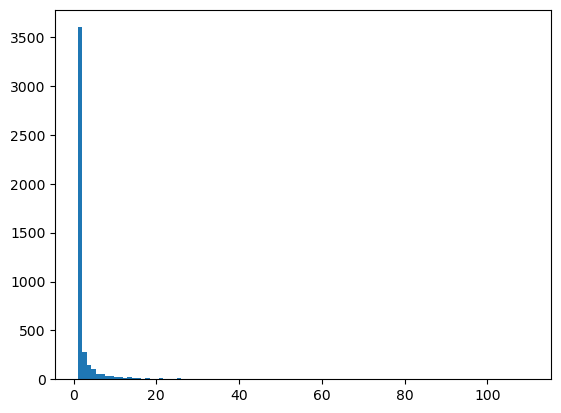

In [6]:
from collections import Counter
import matplotlib.pyplot as plt


plt.hist(Counter(item[-1][:-1] for item in items_with_tuples).values(), bins=100)
plt.show()

In [7]:
len(set(item[-1] for item in items_with_tuples))

12101